In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Barra de progreso de un proceso
# ------------------------------------------------------------------------------
from tqdm import tqdm

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

# Pair Programming Random forest

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal y a un Decision Tree. El objetivo de hoy es:

    - Ajustar el modelo a un Random Forest
    - Extraer las métricas
    - Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [2]:
df = pd.read_csv("../datos/df_regresion.csv", index_col = 0)
df.head()

,City,Product_line,Unit_price,Quantity,Tax_5,Total,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,3.5,0.718160,0.509930,0.919607,0.919607,1.157015,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,1.0,-1.525303,-0.174540,-0.987730,-0.987730,1.364384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,2.0,-0.352781,0.509930,0.071446,0.071446,0.355296,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,3.5,0.096214,0.852165,0.675780,0.675780,0.846698,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,1.0,1.156959,0.509930,1.267125,1.267125,-0.938704,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


In [3]:
df.shape

(1000, 18)

In [4]:
X = df.drop("RATING_LOG", axis = 1)
y = df["RATING_LOG"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
param = {"max_depth": [12,16, 20], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [2,3,4,5],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [7]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [8]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [12, 16, 20],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [9]:
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=12, max_features=3, min_samples_leaf=50,
                      min_samples_split=50)

In [ ]:

# for arbol in tqdm(bosque.estimators_):
#     fig = plt.figure(figsize=(40, 20))
#     tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
#     plt.show()

In [10]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [12]:
dt_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
dt_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.891897,1.095410,1.046618,-0.020355,test,Random Forest
1,0.823097,0.939305,0.969178,0.042172,train,Random Forest


In [13]:

df_LR_DT_results = pd.read_csv("../datos/resultados_supermarket_LR_DT.csv", index_col = 0)
df_LR_DT_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.894338,1.102665,1.050079,-0.027114,test,Linear Regresion
1,0.832396,0.964371,0.982024,0.016612,train,LinearRegression
0,0.889453,1.095361,1.046595,-0.020310,test,Decision tree III
1,0.835795,0.969774,0.984771,0.011102,train,Decision tree III
0,0.889453,1.095361,1.046595,-0.020310,test,Decision tree II
1,0.835795,0.969774,0.984771,0.011102,train,Decision tree II


In [14]:
df_todos_resultados = pd.concat([dt_results, df_LR_DT_results], axis = 0)
df_todos_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.891897,1.095410,1.046618,-0.020355,test,Random Forest
1,0.823097,0.939305,0.969178,0.042172,train,Random Forest
0,0.894338,1.102665,1.050079,-0.027114,test,Linear Regresion
1,0.832396,0.964371,0.982024,0.016612,train,LinearRegression
0,0.889453,1.095361,1.046595,-0.020310,test,Decision tree III
1,0.835795,0.969774,0.984771,0.011102,train,Decision tree III
0,0.889453,1.095361,1.046595,-0.020310,test,Decision tree II
1,0.835795,0.969774,0.984771,0.011102,train,Decision tree II


In [15]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,Total,0.195154
4,Tax_5,0.164162
2,Unit_price,0.154924
13,mes_compra_March,0.082328
3,Quantity,0.059279
1,Product_line,0.056724
11,mes_compra_February,0.046422
16,hora_compra_oe,0.037369
0,City,0.034179
12,mes_compra_January,0.033985


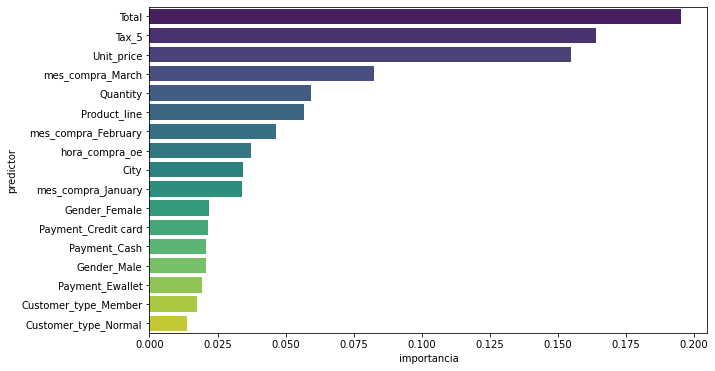

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

Conclusiones:

Basado en el desempeño relativamente bajo del algoritmo de clasificación Random Forest en la predicción de calificaciones de los clientes y en los resultados del resto de algoritmos, se recomienda explorar otros algoritmos y/o incorporar datos relevantes adicionales para mejorar la precisión de las predicciones. Esto puede ser útil para comprender las preferencias de los clientes e implementar estrategias para mejorar la satisfacción y la lealtad del cliente.

El modelo no predice nada por lo que concluímos que las variables utilizadas como predictoras, no son las adecuadas.



Tras estas conclusiones e investigar un poco si existe algún ejemplo de este modelo que sí funcione y no encontrarlo, decidimos probar con otra VR. 